In [63]:
import os
import re
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df=pd.read_csv("laptop.csv")
df.head(3)

,Unnamed: 0.1,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0.1      1303 non-null   int64  
 1   Unnamed: 0        1273 non-null   float64
 2   Company           1273 non-null   object 
 3   TypeName          1273 non-null   object 
 4   Inches            1273 non-null   object 
 5   ScreenResolution  1273 non-null   object 
 6   Cpu               1273 non-null   object 
 7   Ram               1273 non-null   object 
 8   Memory            1273 non-null   object 
 9   Gpu               1273 non-null   object 
 10  OpSys             1273 non-null   object 
 11  Weight            1273 non-null   object 
 12  Price             1273 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [4]:
df.isnull().sum()

Unnamed: 0.1         0
Unnamed: 0          30
Company             30
TypeName            30
Inches              30
ScreenResolution    30
Cpu                 30
Ram                 30
Memory              30
Gpu                 30
OpSys               30
Weight              30
Price               30
dtype: int64

In [5]:
df[df["Company"].isnull()==True].index

Index([  20,   46,   50,  115,  125,  148,  190,  209,  267,  336,  350,  478,
        567,  616,  625,  629,  666,  699,  726,  747,  753,  774,  922,  923,
        938,  978,  994, 1060, 1202, 1245],
      dtype='int64')

In [6]:
df.dropna(axis=0,inplace=True)

In [7]:
df.shape

(1273, 13)

In [8]:
df.nunique()

Unnamed: 0.1        1273
Unnamed: 0          1273
Company               19
TypeName               6
Inches                25
ScreenResolution      40
Cpu                  118
Ram                   10
Memory                40
Gpu                  110
OpSys                  9
Weight               189
Price                777
dtype: int64

In [9]:
df.drop(columns=["Unnamed: 0.1", "Unnamed: 0"],axis=1,inplace=True)
df.head(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000


In [10]:
df['Inches'] = df['Inches'].apply(lambda x: float(x) if len(re.findall(r'^[0-9]+.?[0-9]*$', x))!=0 else np.nan)

In [11]:
df["Ram"].value_counts()

Ram
8GB     601
4GB     367
16GB    194
6GB      40
12GB     25
2GB      22
32GB     17
64GB      3
24GB      3
1GB       1
Name: count, dtype: int64

In [12]:
df["Ram"] = df["Ram"].apply(lambda x: int(x[:-2]))

In [13]:
df.rename(columns={"Weight":"Weight_Kg"}, inplace=True)

In [14]:
df['Weight_Kg'] = df['Weight_Kg'].apply(lambda x: float(x[:-2]) if len(re.findall(r'^[0-9]+.?[0-9]*[k|K][g|G]$', x))!=0 else np.nan)

In [15]:
df[df["Memory"].apply(lambda x: True if x.find('Flash')!=-1 else False)]["Memory"].value_counts()

Memory
32GB Flash Storage               37
64GB Flash Storage               14
256GB Flash Storage               8
16GB Flash Storage                7
128GB Flash Storage               4
512GB Flash Storage               2
64GB Flash Storage +  1TB HDD     1
Name: count, dtype: int64

In [16]:
df.head(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight_Kg,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000


In [17]:
M_df = df['Memory'].value_counts()
M_df

Memory
256GB SSD                        401
1TB HDD                          217
500GB HDD                        130
512GB SSD                        116
128GB SSD +  1TB HDD              92
128GB SSD                         74
256GB SSD +  1TB HDD              71
32GB Flash Storage                37
2TB HDD                           16
64GB Flash Storage                14
512GB SSD +  1TB HDD              14
1TB SSD                           13
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          4
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
128GB SSD +  2TB HDD               2
256GB SSD +  500GB HDD             2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [18]:
tmp=set()
[[tmp.add(x) for x in [s.strip() for s in i.split('+')]] for i in M_df.index]
tmp = list(tmp)
tmp = [(l1.split(" ",1)[1] if len(l1)>1 else l1.split(" ",1)[0]) for l1 in tmp]
tmp = list(set(tmp))
tmp

['HDD', '?', 'Hybrid', 'SSD', 'Flash Storage']

In [19]:
def ext_mem(mem_str, search_for):
    l = mem_str.split('+')
    v = 0
    for i in l:
        l1 = i.strip().split(" ",1)
        if len(l1) == 2 and l1[1].strip().lower()==search_for:
            s = l1[0].strip()[-2:].lower()
#             considering only for GB or TB
            if s=='gb':
                v += int(float(l1[0].strip()[:-2]))
            else:
                v += int(float(l1[0].strip()[:-2])*1000)
    return v

In [20]:
df['SSD'] = df['Memory'].map(lambda x: ext_mem(x,search_for='ssd'))
df['HDD'] = df['Memory'].map(lambda x: ext_mem(x,search_for='hdd'))
df['Hybrid'] = df['Memory'].map(lambda x: ext_mem(x,search_for='hybrid'))
df['Flash_Storage'] = df['Memory'].map(lambda x: ext_mem(x,search_for='flash storage'))

In [21]:
df[['Memory','SSD','HDD','Hybrid','Flash_Storage']].head(5)
# df.drop(columns=['SSD', 'HDD', 'Hybrid', 'Flash_Storage'], inplace=True)

,Memory,SSD,HDD,Hybrid,Flash_Storage
0,128GB SSD,128,0,0,0
1,128GB Flash Storage,0,0,0,128
2,256GB SSD,256,0,0,0
3,512GB SSD,512,0,0,0
4,256GB SSD,256,0,0,0


In [22]:
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                495
1366x768                                         274
IPS Panel Full HD 1920x1080                      226
IPS Panel Full HD / Touchscreen 1920x1080         52
Full HD / Touchscreen 1920x1080                   45
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  14
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160                9
4K Ultra HD 3840x2160                              7
IPS Panel 1366x768                                 7
IPS Panel Retina Display 2560x1600                 6
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
Touchscreen 2560x1440                              6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

In [23]:
def ext_resolution(spec_str):
    if spec_str is not np.nan and spec_str is not None and len(spec_str)!=0:
        l = re.findall(r'[0-9]+[xX][0-9]+',spec_str)
        if len(l)>0:
            return l[0].lower()
        else:
            return np.nan
    else:
        return np.nan

def is_touchscreen(spec_str):
    if spec_str is not np.nan and spec_str is not None and len(spec_str)!=0:
        l = re.findall(r'touchscreen', spec_str.lower())
        if len(l)>0:
            return True
        else:
            return False
    else:
        return np.nan

In [24]:
df['Resolution'] = df['ScreenResolution'].map(ext_resolution)
df['Touchscreen'] = df['ScreenResolution'].map(is_touchscreen)

In [25]:
df[['ScreenResolution','Resolution','Touchscreen']].tail()

,ScreenResolution,Resolution,Touchscreen
1298,IPS Panel Full HD / Touchscreen 1920x1080,1920x1080,True
1299,IPS Panel Quad HD+ / Touchscreen 3200x1800,3200x1800,True
1300,1366x768,1366x768,False
1301,1366x768,1366x768,False
1302,1366x768,1366x768,False


### Pre-Processing 'Cpu' Feature

In [26]:
l = df['Cpu'].value_counts().index.to_list()
print(f"Distinct Values: {len(l)}")

Distinct Values: 118


In [27]:
s = set([s.split(" ",1)[0] for s in l])
print(f"Various Brands: {s}")

Various Brands: {'Samsung', 'Intel', 'AMD'}


In [28]:
# brandwise seperation
def sep_brand(brand, lst):
    for i in l:
        if i is not np.nan and i is not None:
            l1 = re.findall(f'{brand}', i.lower())
            if len(l1)!=0:
                lst.append(i)

In [29]:
intel_lst=[]
amd_lst=[]
samsg_lst=[]
sep_brand('intel',intel_lst)
sep_brand('amd',amd_lst)
sep_brand('samsung',samsg_lst)

In [30]:
# check if records are equal to total count
len(intel_lst) + len(amd_lst) + len(samsg_lst) == 118

True

In [31]:
samsg_lst

['Samsung Cortex A72&A53 2.0GHz']

In [32]:
# seperating processor
c=[]
for i in samsg_lst:
    s = i.lower().split("samsung",1)[1]
    c.append(re.split(r'[0-9]*\.?[0-9]+ghz',s,1)[0].strip())

set(c)

{'cortex a72&a53'}

##### CPU Spec Dictionary

In [33]:
cpu_dict={}
cpu_dict["intel"] = {"atom":"Atom", "celeron dual core":"Celeron Dual Core","celeron quad core":"Celeron Quad Core", "core i3":"Core i3", "core i5":"Core i5", "core i7":"Core i7", "core m":"Core M", "pentium dual core":"Pentium Dual Core", "pentium quad core":"Pentium Quad Core", "xeon":"Xeon"}
cpu_dict["amd"] = {r'a[0-9]*-series':"A-Series", r'e[0-9]*-series':"E-Series", "fx":"FX", "ryzen":"Ryzen"}
cpu_dict["samsung"] = {"cortex":"Cortex"}

In [34]:
p = list(cpu_dict['amd'].keys())[0]
p

'a[0-9]*-series'

In [35]:
k = re.findall(p, 'a6-series a6-9220')[0]
cpu_dict['amd'][p]

'A-Series'

In [36]:
def cpu_brand(cpu_str:str, cpu_dict:dict):
    s = re.split(" ",cpu_str.strip(),1)[0] if cpu_str is not None and len(cpu_str)!=0 else np.nan
    if s is not np.nan:
        for k in list(cpu_dict.keys()):
            l = re.findall(k, cpu_str.lower())
            if len(l)!=0 and l[0]==s.lower():
                return s
    return np.nan

In [37]:
def cpu_proc(cpu_str:str, cpu_dict:dict):
    s = re.split(" ",cpu_str.strip(),1)[0] if cpu_str is not None and len(cpu_str)!=0 else np.nan
    if s is not np.nan:
        d = cpu_dict[s.lower()]
        for k in list(d.keys()):
            l = re.findall(k, cpu_str.lower())
            if len(l)!=0:
                return d[k]
    else:
        return np.nan

In [38]:
def cpu_ghz(cpu_str:str):
    s = re.split(" ",cpu_str.strip(),1)[0] if cpu_str is not None and len(cpu_str)!=0 else np.nan
    if s is not np.nan:
        l = re.findall(r'[0-9]*\.?[0-9]+ghz', cpu_str.lower())
        v = float(l[0][:-3]) if len(l)!=0 else np.nan
        return v
    else:
        return np.nan

In [39]:
df['Cpu_Brand'] = df['Cpu'].map(lambda x: cpu_brand(x, cpu_dict))
df['Cpu_Proc'] = df['Cpu'].map(lambda x: cpu_proc(x, cpu_dict))
df['Cpu_GHz'] = df['Cpu'].map(lambda x: cpu_ghz(x))

In [40]:
df[['Cpu','Cpu_Brand','Cpu_Proc','Cpu_GHz']].tail()

,Cpu,Cpu_Brand,Cpu_Proc,Cpu_GHz
1298,Intel Core i7 6500U 2.5GHz,Intel,Core i7,2.5
1299,Intel Core i7 6500U 2.5GHz,Intel,Core i7,2.5
1300,Intel Celeron Dual Core N3050 1.6GHz,Intel,Celeron Dual Core,1.6
1301,Intel Core i7 6500U 2.5GHz,Intel,Core i7,2.5
1302,Intel Celeron Dual Core N3050 1.6GHz,Intel,Celeron Dual Core,1.6


### Pre-Processing 'Gpu' Feature

In [41]:
l = df['Gpu'].value_counts().index.to_list()
print(f"Distinct values: {len(l)}")
l[:3]

Distinct values: 110


['Intel HD Graphics 620', 'Intel HD Graphics 520', 'Intel UHD Graphics 620']

In [42]:
t=[]
for s in l:
    l1 = re.findall(r'[a-z]+\s[a-z0-9-]+', s.strip().lower())
    if len(l1)!=0:
        t.append(l1[0])
    else:
        t.append(np.nan)
set(t)

{'amd firepro',
 'amd r17m-m1-70',
 'amd r4',
 'amd radeon',
 'arm mali',
 'intel graphics',
 'intel hd',
 'intel iris',
 'intel uhd',
 'nvidia geforce',
 'nvidia gtx',
 'nvidia quadro'}

In [43]:
gpu_dict = {"amd firepro":"AMD Firepro", "amd r17m-m1-70":"AMD R17M-M1-70", "amd r4":"AMD R4", "amd radeon":"AMD Radeon", "arm mali":"ARM Mali", "intel graphics":"Intel Graphics", "intel hd":"Intel HD", "intel iris":"Intel Iris", "intel uhd":"Intel UHD", "nvidia geforce":"Nvidia GeForce", "nvidia gtx":"Nvidia GTX", "nvidia quadro":"Nvidia Quadro"}

In [44]:
def gpu_type(gpu_str:str):
    s = re.findall(r'[a-z]+\s[a-z0-9-]+', gpu_str.strip().lower()) if gpu_str is not None and len(gpu_str)!=0 else np.nan
    if s is not np.nan and len(s)!=0:
        if s[0] in list(gpu_dict.keys()):
            return gpu_dict[s[0]]
        else:
            return np.nan
    else:
        return np.nan

In [45]:
df['Gpu'].map(lambda x: gpu_type(x)).isnull().sum()

0

In [46]:
df['Gpu_Type'] = df['Gpu'].map(lambda x: gpu_type(x))

In [47]:
df[['Gpu','Gpu_Type']].tail()

,Gpu,Gpu_Type
1298,Intel HD Graphics 520,Intel HD
1299,Intel HD Graphics 520,Intel HD
1300,Intel HD Graphics,Intel HD
1301,AMD Radeon R5 M330,AMD Radeon
1302,Intel HD Graphics,Intel HD


### Removing Extra Columns and Pre-Processing

In [48]:
df.head(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight_Kg,...,SSD,HDD,Hybrid,Flash_Storage,Resolution,Touchscreen,Cpu_Brand,Cpu_Proc,Cpu_GHz,Gpu_Type
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,...,128,0,0,0,2560x1600,False,Intel,Core i5,2.3,Intel Iris
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,...,0,0,0,128,1440x900,False,Intel,Core i5,1.8,Intel HD
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,...,256,0,0,0,1920x1080,False,Intel,Core i5,2.5,Intel HD


In [49]:
df.drop(columns=['ScreenResolution','Cpu','Memory','Gpu'],inplace=True)

In [50]:
df.head()

,Company,TypeName,Inches,Ram,OpSys,Weight_Kg,Price,SSD,HDD,Hybrid,Flash_Storage,Resolution,Touchscreen,Cpu_Brand,Cpu_Proc,Cpu_GHz,Gpu_Type
0,Apple,Ultrabook,13.3,8,macOS,1.37,71378.6832,128,0,0,0,2560x1600,False,Intel,Core i5,2.3,Intel Iris
1,Apple,Ultrabook,13.3,8,macOS,1.34,47895.5232,0,0,0,128,1440x900,False,Intel,Core i5,1.8,Intel HD
2,HP,Notebook,15.6,8,No OS,1.86,30636.0000,256,0,0,0,1920x1080,False,Intel,Core i5,2.5,Intel HD
3,Apple,Ultrabook,15.4,16,macOS,1.83,135195.3360,512,0,0,0,2880x1800,False,Intel,Core i7,2.7,AMD Radeon
4,Apple,Ultrabook,13.3,8,macOS,1.37,96095.8080,256,0,0,0,2560x1600,False,Intel,Core i5,3.1,Intel Iris


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1273 entries, 0 to 1302
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        1273 non-null   object 
 1   TypeName       1273 non-null   object 
 2   Inches         1272 non-null   float64
 3   Ram            1273 non-null   int64  
 4   OpSys          1273 non-null   object 
 5   Weight_Kg      1272 non-null   float64
 6   Price          1273 non-null   float64
 7   SSD            1273 non-null   int64  
 8   HDD            1273 non-null   int64  
 9   Hybrid         1273 non-null   int64  
 10  Flash_Storage  1273 non-null   int64  
 11  Resolution     1273 non-null   object 
 12  Touchscreen    1273 non-null   bool   
 13  Cpu_Brand      1273 non-null   object 
 14  Cpu_Proc       1273 non-null   object 
 15  Cpu_GHz        1273 non-null   float64
 16  Gpu_Type       1273 non-null   object 
dtypes: bool(1), float64(4), int64(5), object(7)
memory usage:

In [52]:
df.isnull().sum()

Company          0
TypeName         0
Inches           1
Ram              0
OpSys            0
Weight_Kg        1
Price            0
SSD              0
HDD              0
Hybrid           0
Flash_Storage    0
Resolution       0
Touchscreen      0
Cpu_Brand        0
Cpu_Proc         0
Cpu_GHz          0
Gpu_Type         0
dtype: int64

### Handling Empty or NULL values

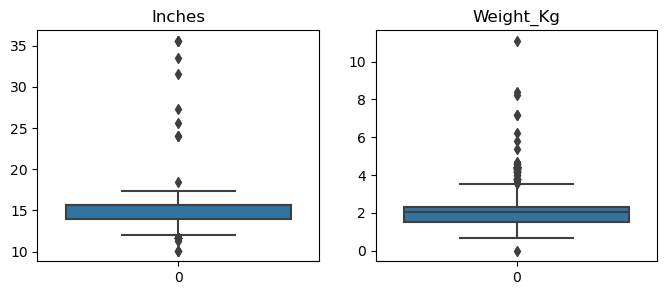

In [53]:
# columns with null values:  Inches, Weight_Kg
fig, axs = plt.subplots(nrows=1,ncols=2,figsize=(8,3))

sns.boxplot(data=df['Inches'], ax=axs[0])
axs[0].set_title('Inches')

sns.boxplot(data=df['Weight_Kg'], ax=axs[1])
axs[1].set_title('Weight_Kg')

plt.show()

In [54]:
for c in ['Inches','Weight_Kg']:
    mean = df[c].mean()
    median = df[c].median()
    print(f"{c} :")
    print(f"\tMean: {mean}")
    print(f"\tMedian: {median}")
    df[c].fillna(median,inplace=True)

Inches :
	Mean: 15.130817610062895
	Median: 15.6
Weight_Kg :
	Mean: 2.077618081761006
	Median: 2.04


In [55]:
df.isnull().sum()

Company          0
TypeName         0
Inches           0
Ram              0
OpSys            0
Weight_Kg        0
Price            0
SSD              0
HDD              0
Hybrid           0
Flash_Storage    0
Resolution       0
Touchscreen      0
Cpu_Brand        0
Cpu_Proc         0
Cpu_GHz          0
Gpu_Type         0
dtype: int64

### Resetting Index and Exporting to new file

In [56]:
df.shape

(1273, 17)

In [57]:
df.tail()

,Company,TypeName,Inches,Ram,OpSys,Weight_Kg,Price,SSD,HDD,Hybrid,Flash_Storage,Resolution,Touchscreen,Cpu_Brand,Cpu_Proc,Cpu_GHz,Gpu_Type
1298,Lenovo,2 in 1 Convertible,14.0,4,Windows 10,1.80,33992.64,128,0,0,0,1920x1080,True,Intel,Core i7,2.5,Intel HD
1299,Lenovo,2 in 1 Convertible,13.3,16,Windows 10,1.30,79866.72,512,0,0,0,3200x1800,True,Intel,Core i7,2.5,Intel HD
1300,Lenovo,Notebook,14.0,2,Windows 10,1.50,12201.12,0,0,0,64,1366x768,False,Intel,Celeron Dual Core,1.6,Intel HD
1301,HP,Notebook,15.6,6,Windows 10,2.19,40705.92,0,1000,0,0,1366x768,False,Intel,Core i7,2.5,AMD Radeon
1302,Asus,Notebook,15.6,4,Windows 10,2.20,19660.32,0,500,0,0,1366x768,False,Intel,Celeron Dual Core,1.6,Intel HD


In [58]:
df.reset_index(drop=True,inplace=True)

In [59]:
print(df.shape)
df.tail()

(1273, 17)


,Company,TypeName,Inches,Ram,OpSys,Weight_Kg,Price,SSD,HDD,Hybrid,Flash_Storage,Resolution,Touchscreen,Cpu_Brand,Cpu_Proc,Cpu_GHz,Gpu_Type
1268,Lenovo,2 in 1 Convertible,14.0,4,Windows 10,1.80,33992.64,128,0,0,0,1920x1080,True,Intel,Core i7,2.5,Intel HD
1269,Lenovo,2 in 1 Convertible,13.3,16,Windows 10,1.30,79866.72,512,0,0,0,3200x1800,True,Intel,Core i7,2.5,Intel HD
1270,Lenovo,Notebook,14.0,2,Windows 10,1.50,12201.12,0,0,0,64,1366x768,False,Intel,Celeron Dual Core,1.6,Intel HD
1271,HP,Notebook,15.6,6,Windows 10,2.19,40705.92,0,1000,0,0,1366x768,False,Intel,Core i7,2.5,AMD Radeon
1272,Asus,Notebook,15.6,4,Windows 10,2.20,19660.32,0,500,0,0,1366x768,False,Intel,Celeron Dual Core,1.6,Intel HD


In [64]:
if not os.path.isfile('featured_laptop.csv'):
    df.to_csv('featured_laptop.csv',index=False)